Labo 5 ISD - Alexandre Jaquier et Valentin Kaelin

# 1. Régression linéaire simple

**1)** Installez la bibliothèque sklearn

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from random import randrange, seed

**2)** Créez un notebook pour lire la base de données «Boston housing dataset » et générez un dataframe.

In [2]:
boston_dataset = load_boston()
boston_frame = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
boston_frame['MEDV'] = boston_dataset.target

boston_frame.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**3)** Se familiariser avec la base de données (p.ex., nombre d’observations, des classes, d’attributs, statistiques des attributs, données manquantes).  
Générez un histogramme de la distribution de la variable indépendente.

In [3]:
print(boston_frame.count())
print("-----------------------------------")
print(boston_frame.dropna().count())
print("-----------------------------------")
print(boston_frame.isnull().sum())

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64
-----------------------------------
CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64
-----------------------------------
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [4]:
print(boston_frame.columns)
print(len(boston_frame.columns))

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
14


Text(0, 0.5, 'Numbers of owner-occupied homes')

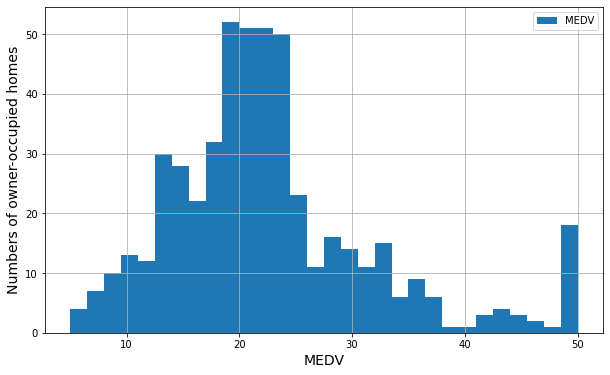

In [5]:
#print(boston_frame['MEDV'])
plot = pd.plotting.hist_series(boston_frame['MEDV'], legend=True, figsize=(10, 6), bins=30)
plot.set_title('', fontsize=15)
plot.set_xlabel('MEDV', fontsize=14)
plot.set_ylabel('Numbers of owner-occupied homes', fontsize=14)
#plot.set_yscale('log')

**4)** Visualiser des boxplots des variables MEDV, RM, LSTAT, RAD, DIS et AGE.  
Commentez vos observations.

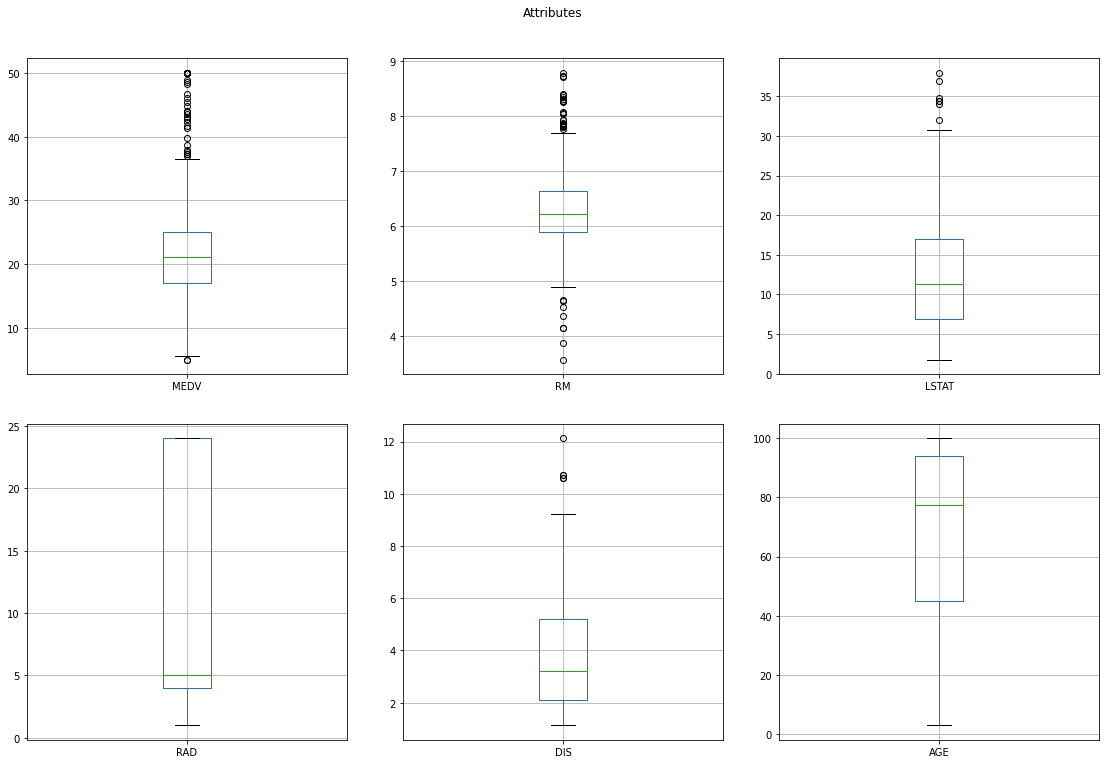

In [6]:
labels_to_show = ['MEDV', 'RM', 'LSTAT', 'RAD', 'DIS', 'AGE']
columns_to_show = boston_frame[labels_to_show].columns

fig, axes = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(16, 16))
for col in range(9):
    if(col < len(columns_to_show)):
        boston_frame.boxplot(columns_to_show[col], ax=axes[col // 3, col % 3])
    else:
        fig.delaxes(axes[col // 3, col % 3])
    
fig.suptitle('Attributes')
plt.tight_layout(pad=3)

On observe que certains attributs sont mieux répartis que d'autres. L'attribut RAD par exemple n'est pas très utile.  
Certains attributs comme MEDV ou RM possèdent de nombreux outliers.

**5)** Créez des modèles en utilisant l’algorithme de régression linéaire simple vue en cours pour estimer la valeur MEDV à partir des variables RM, RAD et LSTAT,
chaque fois utilisant seulement une des variables.  

Programmez les fonctions pour faire une validation hold-out (e.g., 80% train + 20% test x 100 fois) et pour calculer le coefficient de détermination afin d’évaluer
la performance moyenne du modèle.

Commentez vos résultats.

In [7]:
seed(42)

def split_test_set(dataset, ratio):
    test_set_split = list()
    copy = list(dataset)
    test_size = int(len(dataset) * ratio)
    while len(test_set_split) < test_size:
        i = randrange(len(copy))
        test_set_split.append(copy.pop(i))
    return test_set_split, copy

#boston_test, boston_train_validation = split_test_set(boston_frame.values.tolist(), 0.20)


'''
def split_test_set(dataset, ratio):
    test_set_split = pd.DataFrame()
    copy = pd.DataFrame(dataset)
    test_size = int(len(dataset) * ratio)
    while len(test_set_split) < test_size:
        i = randrange(len(copy))
        row_to_append = copy.iloc[i]
        print(row_to_append)
        copy.drop(i)
        test_set_split.append(row_to_append)
    return test_set_split, copy

# On garde 1/4 des données pour la validation finale
#boston_test, boston_train_validation = split_test_set(boston_frame, 0.20)
#print(boston_train_validation)
print('ALO')

test = pd.DataFrame()
test.loc[len(test)] = boston_frame.iloc[2]

print(test)
'''

#print(type(boston_train_validation))
#print(boston_train_validation)

"\ndef split_test_set(dataset, ratio):\n    test_set_split = pd.DataFrame()\n    copy = pd.DataFrame(dataset)\n    test_size = int(len(dataset) * ratio)\n    while len(test_set_split) < test_size:\n        i = randrange(len(copy))\n        row_to_append = copy.iloc[i]\n        print(row_to_append)\n        copy.drop(i)\n        test_set_split.append(row_to_append)\n    return test_set_split, copy\n\n# On garde 1/4 des données pour la validation finale\n#boston_test, boston_train_validation = split_test_set(boston_frame, 0.20)\n#print(boston_train_validation)\nprint('ALO')\n\ntest = pd.DataFrame()\ntest.loc[len(test)] = boston_frame.iloc[2]\n\nprint(test)\n"

In [73]:
def train_test_split(dataset, split=0.60):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

def compute_MSE(b, m, data):
    totalError = 0 # Mean squared error formula
    for i in range (0, len(data)):
        x = data[i, 0] # variable indépendante
        y = data[i, 1] # variable dépendante
        totalError += (y-(m*x + b)) ** 2 # somme des différences au carré
    return totalError/ float(len(data)) # on divise par N

def step_gradient(b_current, m_current, data, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y - (m_current * x + b_current))

    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b,new_m]

def gradient_descent(data, starting_b, starting_m, learning_rate, num_epochs):
    b = starting_b
    m = starting_m
    for i in range(num_epochs):
        b, m = step_gradient(b, m, np.array(data), learning_rate)
        #print("After {0} epochs b = {1}, m = {2}, error = {3}".format(i, b, m, compute_MSE(b, m, data)))
    return [b, m]


linear_regression_attributes = ['RM', 'RAD', 'LSTAT']
index_medv = boston_frame.columns.get_loc('MEDV')
n_splits = 20

results_by_attributes = {}
for attr in linear_regression_attributes:
    results_by_attributes[attr] = {'b': [], 'm': [], 'e': []}
    
print(results_by_attributes)

#Step 2: On choisit les hyperparamètres
# TODO: trouver des params moins éclatax
hyper_params_by_attributes = {
    'RM': {
        'num_epochs': 50,
        'learning_rate': 0.001,
    },
    'RAD': {
        'num_epochs': 50,
        'learning_rate': 0.03,
    },
    'LSTAT': {
        'num_epochs': 50,
        'learning_rate': 0.03,
    }
}

print(hyper_params_by_attributes)

for attr in linear_regression_attributes:
    num_epochs = hyper_params_by_attributes[attr]['num_epochs']
    learning_rate = hyper_params_by_attributes[attr]['learning_rate']
    for i in range(n_splits):
        boston_test, boston_train_validation = train_test_split(boston_frame.values.tolist(), 0.2)
        
        data = np.array([[i[boston_frame.columns.get_loc(attr)], i[index_medv]] for i in boston_train_validation])

        #Step 3: On initialise la valeur de m et de b
        initial_b = np.random.rand(1) # intercept
        initial_m = np.random.rand(1) # pente

        #Step 4: On applique la méthode du gradient descendant
        #print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_MSE(initial_b, initial_m, data)))
        #print("Running...")
        [b, m] = gradient_descent(data, initial_b, initial_m, learning_rate, num_epochs)
        #print(type(b))
        results_by_attributes[attr]['b'].append(b[0])
        results_by_attributes[attr]['m'].append(m[0])
        results_by_attributes[attr]['e'].append(compute_MSE(b[0], m[0], data))
        #print("After {0} epochs b = {1}, m = {2}, error = {3}".format(num_epochs, b, m, compute_MSE(b, m, data)))

#print(results_by_attributes)
print('FINITO')

{'RM': {'b': [], 'm': [], 'e': []}, 'RAD': {'b': [], 'm': [], 'e': []}, 'LSTAT': {'b': [], 'm': [], 'e': []}}
{'RM': {'num_epochs': 50, 'learning_rate': 0.001}, 'RAD': {'num_epochs': 50, 'learning_rate': 0.03}, 'LSTAT': {'num_epochs': 50, 'learning_rate': 0.03}}
FINITO


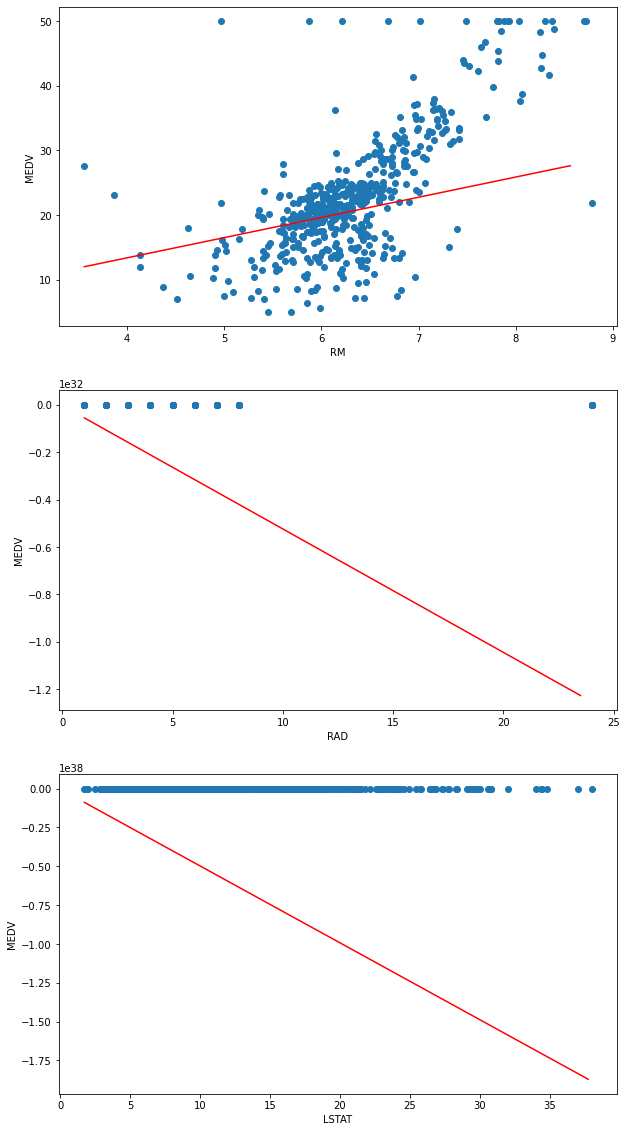

In [72]:
fig, ax = plt.subplots(len(linear_regression_attributes), figsize=(10, 20))



for i in range(len(linear_regression_attributes)):
    attr = linear_regression_attributes[i]
    
    #print(results_by_attributes[attr]['b'])
    #print(results_by_attributes[attr]['m'])
    #print('----')
    
    mean_b = np.mean(results_by_attributes[attr]['b'])
    mean_m = np.mean(results_by_attributes[attr]['m'])
    mean_e = np.mean(results_by_attributes[attr]['e'])
    x_data = boston_frame[attr]
    ax[i].scatter(x_data, boston_frame['MEDV'])
    x = np.arange(x_data.min(), x_data.max(), 0.5)
    ax[i].plot(x, mean_m*x + mean_b, 'r')
    ax[i].set_xlabel(attr)
    ax[i].set_ylabel('MEDV')
    #ax[i].set_ylim([-100, 100])
